# 简单垂直条形图

案例一：直辖市GDP水平

       中国的四个直辖市分别为北京市、上海市、天津市和重庆市，其2017年上半年的GDP分别为12406.8亿、13908.57亿、9386.87亿、9143.64亿。对于这样一组数据，我们该如何使用条形图来展示各自的GDP水平呢？

In [34]:
# 导入绘图模块
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
plt.rcParams['figure.dpi'] = 200

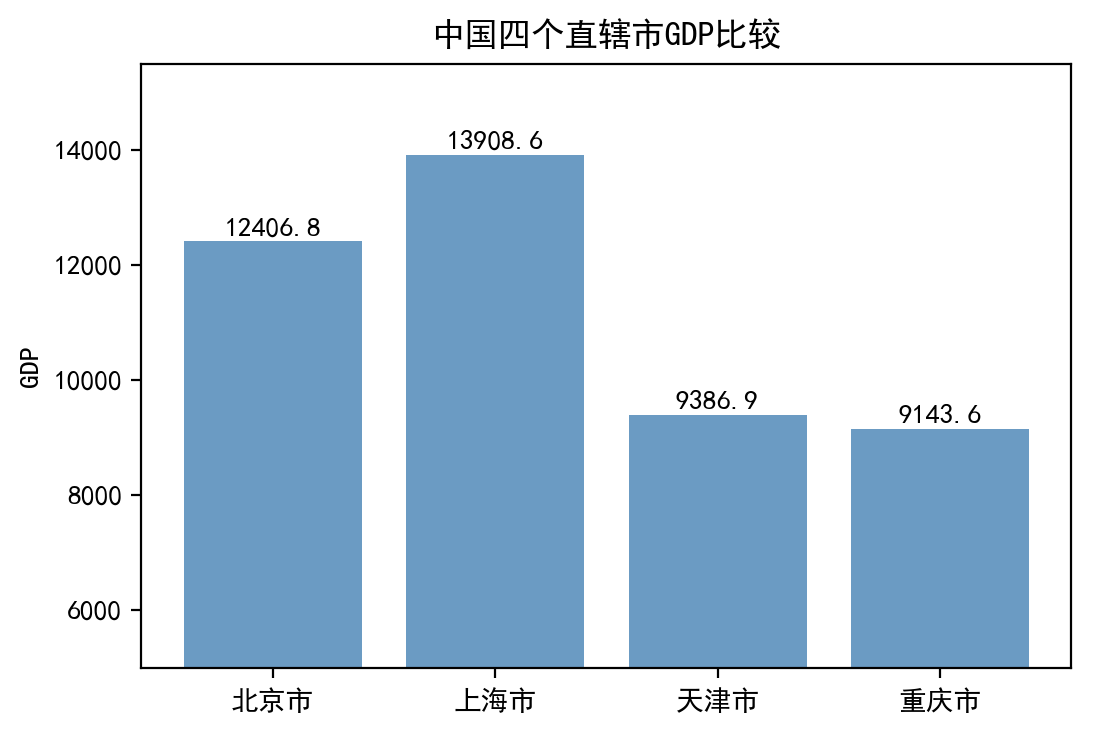

In [17]:
# 构建数据
GDP = [12406.8,13908.57,9386.87,9143.64]
cities = ['北京市','上海市','天津市','重庆市']

# 绘图
plt.bar(range(4), GDP, align='center', color='steelblue', alpha=0.8)

# 添加标签
plt.ylabel('GDP')
# 添加标题
plt.title('中国四个直辖市GDP比较')
# 设置x轴标签
plt.xticks(range(4), cities)
# 设置y轴刻度范围
plt.ylim(5000, 15500)

# 为每个条形图添加数值标签
for x, y in enumerate(GDP):
    plt.text(x, y+100, '{:.1f}'.format(y), ha='center')
plt.show()

# 简单水平条形图

案例二：同一本书不同平台最低价比较

       很多人在买一本书的时候，都比较喜欢货比三家，例如《python数据分析实战》在亚马逊、当当网、中国图书网、京东和天猫的最低价格分别为39.5、39.9、45.4、38.9、33.34。针对这个数据，我们也可以通过条形图来完成，这里使用水平条形图来显示：

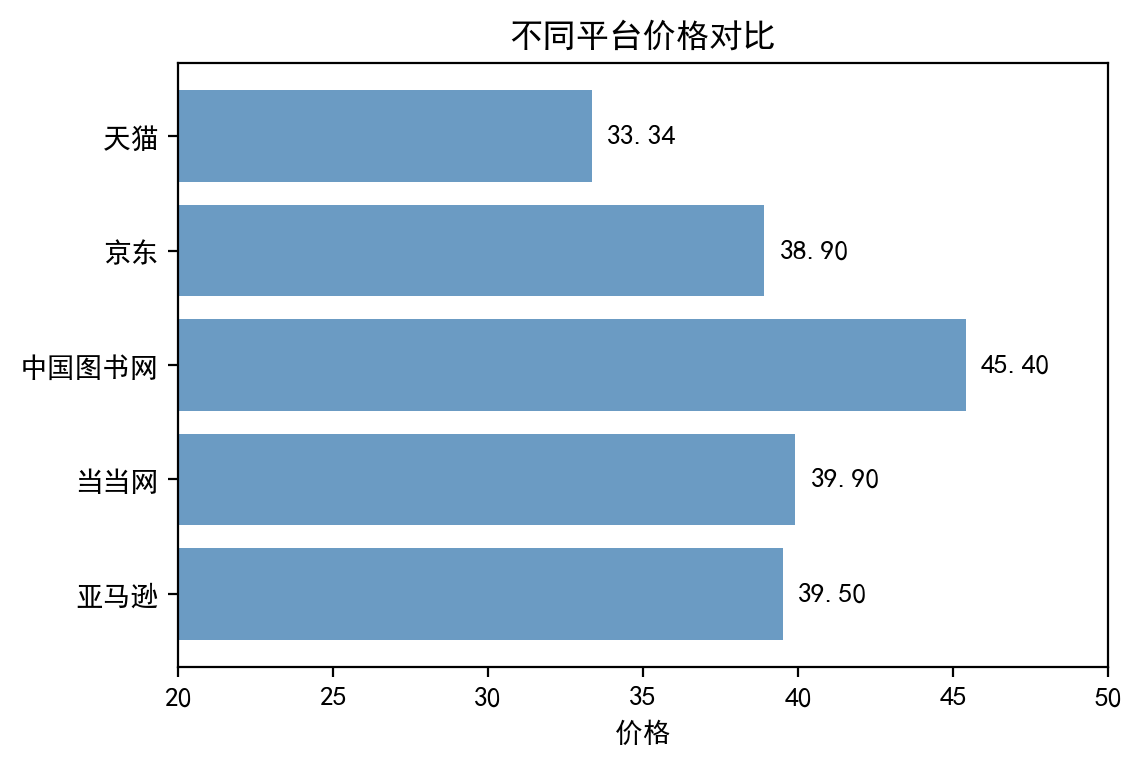

In [33]:
# 构建数据
price = [39.5,39.9,45.4,38.9,33.34]
platform = ['亚马逊','当当网','中国图书网','京东','天猫']

# 绘图
plt.barh(range(len(price)), price, align='center', color='steelblue', alpha=0.8)

# 添加标签
plt.xlabel('价格')
plt.title('不同平台价格对比')

# 设置x轴上下限
plt.xlim(20, 50)

# 设置y轴标签
plt.yticks(range(len(price)), platform)

# 为每一个条形增加标签
for x, y in enumerate(price):
    plt.text(y+0.5, x, "{:.2f}".format(y), va='center') # va=center垂直居中
plt.show()


# 水平交错条形图

以上讲的简单垂直和水平条形图是基于一种离散变量的情况，针对两种离散变量的条形图我们可以使用水平交错条形图和堆叠条形图，下面我们就来看看这两种条形图是如何绘制的。

案例三：胡润财富榜：亿万资产超高净值家庭数

利用水平交错条形图对比2016年和2017年亿万资产超高净值家庭数（top5），其数据如下：

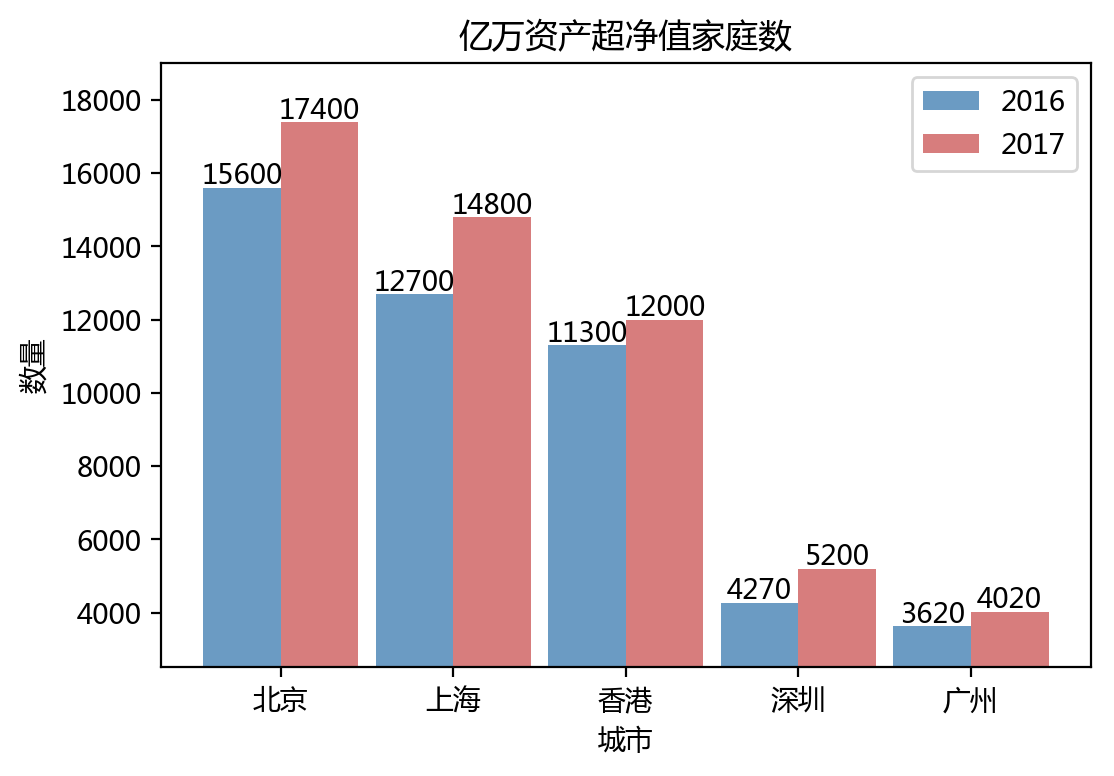

In [65]:
# 构建数据
Y2016 = [15600,12700,11300,4270,3620]
Y2017 = [17400,14800,12000,5200,4020]
labels = ['北京','上海','香港','深圳','广州']
bar_width = 0.45

# 绘图
plt.bar(range(len(Y2016)), Y2016, label='2016', color='steelblue',
        width=bar_width, alpha=0.8)

plt.bar(np.arange(len(Y2017))+bar_width, Y2017, label='2017', color='indianred',
        width=bar_width, alpha=0.8)

# 添加标签
plt.xlabel('城市')
plt.ylabel('数量')
plt.title('亿万资产超净值家庭数')

# 添加刻度标签
plt.xticks(np.arange(5)+bar_width/2,labels)
# 设置y轴上限
plt.ylim([2500, 19000])

# 为每个条形增加文字描述
for x2016, y2016 in enumerate(Y2016):
    plt.text(x2016, y2016+100, "{}".format(y2016), ha='center')

for x2017, y2017 in enumerate(Y2017):
    plt.text(x2017+bar_width, y2017+100, "{}".format(y2017), ha='center')

plt.legend(loc='upper right')
plt.show()

# 垂直堆栈条形图

垂直堆叠条形图的绘制思想与水平交错条形图一样，只不过一个是向上偏移，一个是往左偏移，具体我们以案例说明。

案例四：2017年物流运输量情况分布

In [100]:
# 导入数据
data = pd.read_excel('data/货运.xls', index_col=0)
data

,Jan,Feb,Mar,Api,May,Jun,Jul,Aug
Index,,,,,,,,
铁路,31058,28121,32185,30133,30304,29934,31002,31590
公路,255802,179276,285446,309576,319713,320028,319809,331077
水运,52244,46482,50688,54728,55813,59054,57353,57583
民航,57,42,59,57,60,58,55,57


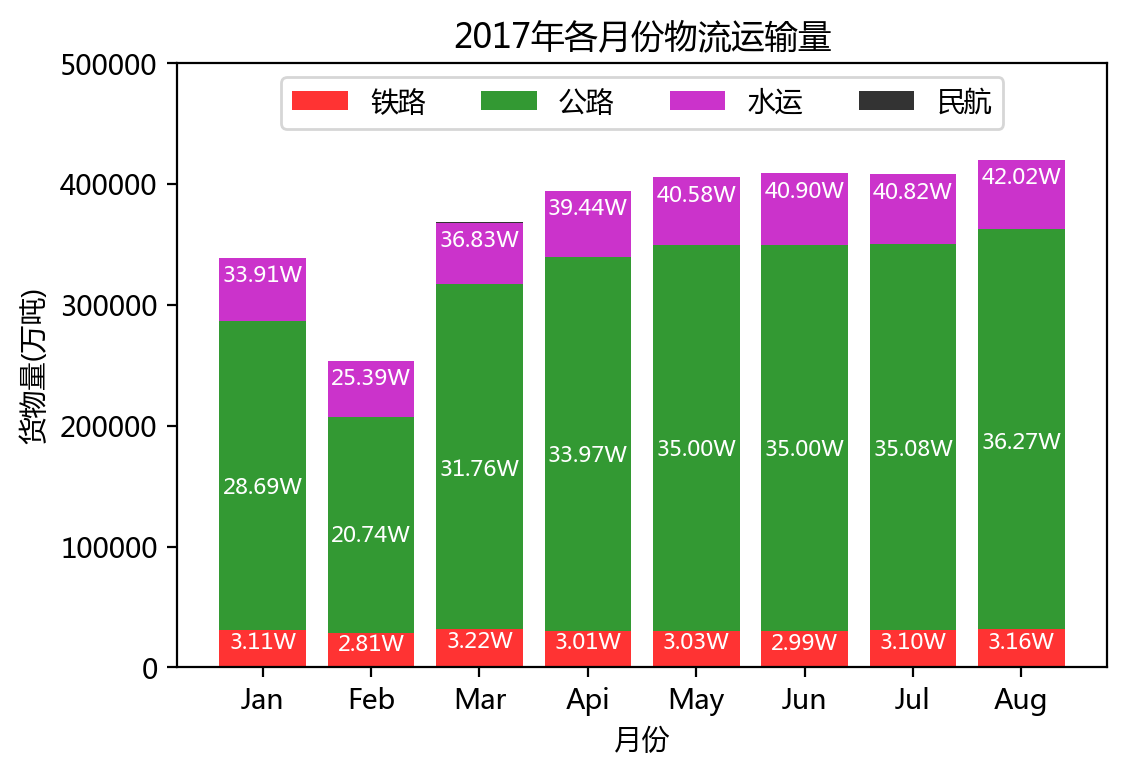

In [118]:
# 绘图
plt.bar(np.arange(8), data.iloc[0],
        color='red', alpha=0.8, label=data.index[0],align='center')
plt.bar(np.arange(8), data.iloc[1],bottom=data.iloc[0],
        color='green', alpha=0.8, label=data.index[1], align='center')
plt.bar(np.arange(8), data.iloc[2],bottom=data.iloc[0]+ data.iloc[1],
        color='m', alpha=0.8, label=data.index[2], align='center')
plt.bar(np.arange(8), data.iloc[3],bottom=data.iloc[:-1].sum(),
        color='black', alpha=0.8, label=data.index[3], align='center')

# 添加标签
plt.xlabel('月份')
plt.ylabel('货物量(万吨)')
plt.title('2017年各月份物流运输量')

# 为x轴添加标签
plt.xticks(np.arange(8), data.columns)

# 设置y轴上下限
plt.ylim(0, 500000)

# 为每一条形图添加数值标签
for x1, y1 in enumerate(data.iloc[0]):
    plt.text(x1, y1/2, "{:.2f}W".format(y1/10000), ha='center',
             color='white', fontsize=8)

for x2, y2 in enumerate(data.iloc[:2].sum()):
    plt.text(x2, y2/2, "{:.2f}W".format(y2/10000), ha='center',
             color='white', fontsize=8)
    
for x3, y3 in enumerate(data.iloc[:3].sum()):
    plt.text(x3, y3-20000, "{:.2f}W".format(y3/10000), ha='center',
             color='white', fontsize=8)
    
# for x1, y1 in enumerate(data.iloc[:-1].sum()):
#     plt.text(x1, y1/2, "{:.2f}W".format(y1/10000), ha='center',
#              color='white', fontsize=8)

plt.legend(loc='upper center', ncol=4)
plt.show()